# kNN



## Задачи и вопросы на понимание теории

### Задача 1

Предположим, мы решаем задачу классификации на три класса по двум признакам и используем метод k ближайших соседей с k=3 и манхэттанской метрикой. Мы имеем следующую обучающую выборку:

| Признак 1 | Признак 2 | Класс |
|-----------|-----------|-------|
| 1         | -1        | 1     |
| 2         | 2         | 1     |
| 3         | 2         | 2     |
| 1         | 0         | 3     |
| 2         | -2        | 3     |

Каковы будут предсказания для объекта $x=(2, -1)$?



__Решение.__

Алгоритм предсказания kNN для задачи классификации:
1. Вычислить расстояние от каждого объекта обучающей выборки до тестового объекта.
1. Найти k объектов обучающей выборки (соседей) с наименьшим расстоянием до тестового объекта.
1. Вернуть наиболее встречающийся класс среди k соседей.

Вычислим расстояния. Расстояние от первого объекта в обучении до тестового объекта $x$ (манхэттэнская метрика):

$$|1-2| + |-1-(-1)| = 1.$$

Аналогично для 2-5 объектов: получатся расстояния 3, 4, 2, 1.

Находим 3 ближайших объекта: это объекты с номерами 1, 4, 5 (расстояния 1, 2, 1 соответственно). Эти три объекта относятся к классам 1, 3, 3. Чаще всего встречается класс 3, поэтому предсказываем 3.

### Задача 2

Визуализируйте разделяющую поверхность между классами для следующей выборки:

| Признак 1 | Признак 2 | Класс |
|-----------|-----------|-------|
| 2         | 2        | 1     |
| 3         | 2         | 1     |
| 2         | 0         | 2     |
| 1         | -1         | 3     |
| 1        | 1        | 3     |

Используйте k=1 и евклидово расстояние.

__Решение.__

В задачах классификации с двумя признаками мы можем изобразить признаковое пространство на плоскости и раскрасить его в разные цвета в соответствии с классом каждой точки плоскости. В этом и состоит сейчас наша задача.

Для начала отобразим на плоскости обучающую выборку - пять точек - в соответствии с их координатами.

При $k=1$ каждая точка плоскости будет относиться к тому же классу, что и ближайший к ней объект обучающей выборки. Если нам даны две точки разных классов, то чтобы провести между ними границу классов, нужно построить серединный перпендикудяр. Для случая с несколькими точками нужно построить несколько серединных перпендикуляров, найти их точки пересечения и определить, какие области к каким классам относятся. Более строго такая конструкция задается с помощью [Диаграммы Вороного](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D0%BE%D0%B3%D0%BE), но мы не будем вдаваться в ее детали.

<img src="https://storage.yandexcloud.net/ml-course-images/classifi.png" width="350">


### Задача 3

Предположим, мы решаем задачу регрессии по двум признакам и используем метод k ближайших соседей с k=3 и манхэттанской метрикой. Мы имеем следующую обучающую выборку:

| Признак 1 | Признак 2 | Ответ |
|-----------|-----------|-------|
| 1         | -1        | 3.5     |
| 2         | 2         | 2.3     |
| 3         | 2         | 1.7     |
| 1         | 0         | -0.4     |
| 2         | -2        | 0.1     |

Каковы будут предсказания для объекта $x=(2, -1)$?

__Решение.__
Предсказания kNN для регрессии отличаются от предсказаний для классификации только финальным шагом: вместо поиска наиболее часто встречающегося класса нужно усреднить ответы на соседях. Признаки в этой задаче те же, что в задаче 1, поэтому соседей мы уже знаем: это объекты с номерами 1, 4, 5. На них мы имеем ответы 3.5, -0.3, 0.1. Усредним их: (3.5-0.4+0.1)/3 = 1.1. Предсказываем 1.1.

### Вопрос: каковы параметры и гиперпараметры метода kNN?

__Ответ:__

Параметры - это величины, которые мы настраиваем в процессе обучения по обучающей выборке. В методе kNN нет как такового обучения - это очень простой эвристический алгоритм. Под параметрами в kNN можно понимать обучающую выборку. В другой трактовке у метода нет параметров.

Гиперпараметры - это величины, которые мы должны установить до начала обучения модели. Гиперпараметры не настраиваются по обучающей выборке в процессе обучения модели. Два самых важных гиперпараметры метода kNN - это число соседей k и метрика. Используя разные комбинации этих гиперпараметров, можно получать совершенно разное качество работы алгоритма. Гиперпараметры обычно настраивают по валидационной выборке или используя кросс-валидацию.

### Вопрос: Какова динамика качества работы kNN при увеличении k?

__Ответ:__

При $k=1$ вокруг каждого объекта обучающей выборки создается область его класса. Если, к примеру, в "большую" область одного класса случайно попал один шумовой объект другого класса, вокруг этого шумового объекта будет "остров" предсказания другого класса. Это нелогично и говорит о переобучении.

При $k$, равном числу объектов в выборке, для всех объектов будет предсказываться одно и то же, что вновь говорит о низком качестве работы классификатора. Получается, что качество kNN при увеличении $k$ должно сначала расти, а потом падать, и оптимум будем где-то посередине.

Рассмотрим синтетический пример: на рисунке визуализирована обучающая выборка ("настоящая" разделяющая поверхность - прямая) и разделяющая поверхность kNN по аналогии с задачей 2, и на разных графиках используется разное число соседей $k$:

<img src="https://storage.yandexcloud.net/ml-course-images/k_grid.png" width="350">

При использовании малых $k$ разделяющая поверхность слишком сложная, на нее оказывают сильное воздействие шумовые объекты. Далее поверхность становится все ровнее и ровнее и при $k=50$ выглядит наиболее разумно. При большем k разделяющая поверхность уходит от линейной, и оранжевый класс "захватывает" синий.

### Вопрос: Почему при использовании kNN важно нормировать данные?

__Ответ:__

Рассмотрим для примера манхэттэнскую метрику. Если один признак будет иметь масштаб около 1000, а другой - около 1, то когда мы будем складывать модули разностей для этих двух признаков, второй признак практически не будет иметь влияния на ответ. Если же признаки отнормировать, но они все будут в одной шкале.

## Практическая часть

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle

В этом нотубуке мы будем работать с датасетом из цифр. Это стандартный учебный датасет, и он есть в [библиотеке sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html), загрузим его оттуда.

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)

data = load_digits()
X = data.images
y = data.target

X.shape

(1797, 8, 8)

Признаки в датасете хранятся в виде матрицы чисел - значений яркости пикселей от 0 (черный) до 16 (белый)

In [ ]:
X

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

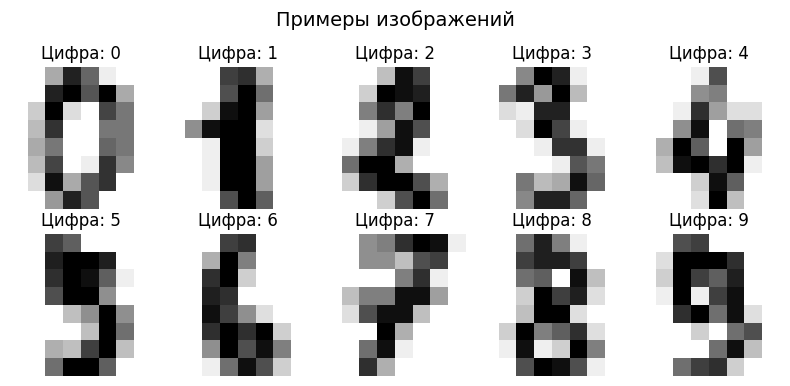

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(8, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(data.images[i], cmap="gray_r")
    ax.set_title(f"Цифра: {data.target[i]}")
    ax.axis("off")

plt.suptitle("Примеры изображений", fontsize=14)
plt.tight_layout()
plt.show();


In [ ]:
# вытягиваем квадратное изображение в вектор, чтобы получить матрицу объекты-признаки
X = X.reshape(X.shape[0], -1)

# перемешиваем данные
X, y = shuffle(X, y)
print(f"Features shape: {X.shape},\nTarget shape: {y.shape}")
print(f"Target samples: {y[:10]}")

Features shape: (1797, 64),
Target shape: (1797,)
Target samples: [5 8 3 4 6 7 9 5 6 4]


In [ ]:
X_train, y_train = X[:700, :], y[:700]
X_val, y_val = X[700:1300, :], y[700:1300]
X_test, y_test = X[1300:, :], y[1300:]

In [ ]:
# Обучаем классификатор и делаем предсказания
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)

In [ ]:
# Вычисляем простейшую метрику качества алгоритма - долю правильных ответов
print("Accuracy is: ", np.mean(y_test==y_predicted))

Accuracy is:  0.9798792756539235


Учитывая, что у нас 10 классов, то вероятность угадать правильный ответ много раз очень мала. Поэтому полученное значение accuracy - очень хороший результат!

Попробуем использовать разные значения гиперпараметра k. Сравнивать разные значения k по обучающей выборке бесполезно: каждый объект является ближайшим сам к себе и оптимальное k будет равно 1. Будем сравнивать разные k по качеству на валидационной выборке:

In [ ]:
# Подбор k на валидационной выборке:
k_best = -1
best_accuracy = 0

for k in range(1, 20):
    y_predicted = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train).predict(X_val)

    val_accuracy = np.mean(y_predicted==y_val)
    print(f"k = {k}; accuracy = {val_accuracy:.3f}")

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        k_best = k

k_best

k = 1; accuracy = 0.993
k = 2; accuracy = 0.978
k = 3; accuracy = 0.978
k = 4; accuracy = 0.975
k = 5; accuracy = 0.975
k = 6; accuracy = 0.977
k = 7; accuracy = 0.977
k = 8; accuracy = 0.973
k = 9; accuracy = 0.972
k = 10; accuracy = 0.970
k = 11; accuracy = 0.962
k = 12; accuracy = 0.960
k = 13; accuracy = 0.960
k = 14; accuracy = 0.960
k = 15; accuracy = 0.957
k = 16; accuracy = 0.953
k = 17; accuracy = 0.955
k = 18; accuracy = 0.953
k = 19; accuracy = 0.950


1

Сравним accuracy на обучении, валидации и тесте для найденного лучшего значения k:

In [ ]:
clf = KNeighborsClassifier(n_neighbors=k_best)
clf.fit(X_train, y_train)

for X_data, y_data in zip([X_train, X_val, X_test], [y_train, y_val, y_test]):
    y_predicted = clf.predict(X_data)
    print(f"Accuracy: {np.mean(y_predicted==y_data):.3f}")

Accuracy: 1.000
Accuracy: 0.993
Accuracy: 0.978


Качество на обучающей выборке самое лучшее, но оно обманчиво, ведь алгоритм уже знает эти объекты.
На валидационной выборке мы тоже использовали ответы - уже для подбора гиперпараметра k, так что этот показатель тоже не совсем честный.
И действительно, качество на тестовой выборке (ответы для которой мы нигде не подсматривали) может оказаться хуже, чем на валидационной выборке.

_Вывод_: оценивать качество алгоритма нужно на отложенной выборке, которая не используется нигде в обучении и не используется в подборе гиперпараметров.